In [1]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [2]:
len(df_claim)

1428600

In [3]:
#filter base on the section H
df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"
...,...,...,...,...
1428585,10367288,Electric contact and connector terminal pair,1. An electric contact comprising: a first con...,"C25D,H01R"
1428587,10368332,Enhanced location determination of wireless de...,"1. A device, the device comprising memory and ...",H04W
1428588,10367624,Uplink multi-bits acknowledgement for self con...,1. A method for communicating feedback in wire...,"H04L,H04W"
1428590,10367054,Semiconductor memory device,"1. A semiconductor memory device, comprising: ...",H01L


In [4]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto

C:\Users\admin\AppData\Local\Temp/ipykernel_9396/844082689.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"
...,...,...,...,...
570653,10367288,Electric contact and connector terminal pair,1. An electric contact comprising: a first con...,"C25D,H01R"
570654,10368332,Enhanced location determination of wireless de...,"1. A device, the device comprising memory and ...",H04W
570655,10367624,Uplink multi-bits acknowledgement for self con...,1. A method for communicating feedback in wire...,"H04L,H04W"
570656,10367054,Semiconductor memory device,"1. A semiconductor memory device, comprising: ...",H01L


In [5]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"
...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E"
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L"
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L"
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J


# preprocessing

In [6]:
def cleantext(df_claim_uspto):
    
    # Replace certain characters with empty string
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # Convert all text to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    # Remove all numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    # Remove all symbols except alphabets and numbers
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    # Remove all punctuations
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    # Remove all URLs
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    
    # Remove multiple spaces and replace with a single space
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    # Return the cleaned dataframe
    return df_claim_uspto

# Call the function to clean the dataframe and save the result in df_claim_uspto
df_claim_uspto = cleantext(df_claim_uspto)

# Print the cleaned dataframe
df_claim_uspto


C:\Users\admin\AppData\Local\Temp/ipykernel_9396/3384947362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
C:\Users\admin\AppData\Local\Temp/ipykernel_9396/3384947362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
C:\Users\admin\AppData\Local\Temp/ipykernel_9396/3384947362.py:10: S

,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...
...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...


In [7]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_9396/3001502917.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...
...,...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...,load circuit disconnection detector breaks loa...
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...,light emitting first layer generates light inj...
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...,driver driving output signal output pad pulldo...
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...,ion detector mass spectrometer ion detector co...


In [8]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto


C:\Users\admin\AppData\Local\Temp/ipykernel_9396/423572630.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...
...,...,...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...,load circuit disconnection detector breaks loa...,load circuit disconnection detector break load...
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...,light emitting first layer generates light inj...,light emitting first layer generates light inj...
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...,driver driving output signal output pad pulldo...,driver driving output signal output pad pulldo...
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...,ion detector mass spectrometer ion detector co...,ion detector mass spectrometer ion detector co...


In [9]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\admin\AppData\Local\Temp/ipykernel_9396/2856393971.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
59995,9083179,Load circuit disconnection detector,1. A load circuit disconnection detector which...,"G01R,H02H,Y02E",a load circuit disconnection detector which b...,load circuit disconnection detector breaks loa...,load circuit disconnection detector break load...,"[load, circuit, disconnection, detector, break..."
59996,9081267,Light emitting device and projector,1. A light emitting device comprising: a first...,"G02B,G03B,H01L",a light emitting device comprising a first la...,light emitting first layer generates light inj...,light emitting first layer generates light inj...,"[light, emitting, first, layer, generates, lig..."
59997,9083330,Output driver with slew rate calibration,1. A driver for driving a data output signal t...,"H03K,H04L",a driver for driving a data output signal thr...,driver driving output signal output pad pulldo...,driver driving output signal output pad pulldo...,"[driver, driving, output, signal, output, pad,..."
59998,9082598,Segmented planar calibration for correction of...,1. An ion detector system for a mass spectrome...,H01J,an ion detector system for a mass spectromete...,ion detector mass spectrometer ion detector co...,ion detector mass spectrometer ion detector co...,"[ion, detector, mass, spectrometer, ion, detec..."


# divide the dataset

In [10]:
#Divide the dataset into different size
df_claim_20K=df_claim_uspto[:20000]
df_claim_20K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
19995,8975813,Light emitting device,1. A display device comprising: a first substr...,"H01L,Y10S",a display device comprising a first substrate...,display first substrate first pixel first subs...,display first substrate first pixel first subs...,"[display, first, substrate, first, pixel, firs..."
19996,8975173,Semiconductor device with buried gate and meth...,1. A method for fabricating a semiconductor de...,H01L,a method for fabricating a semiconductor devi...,fabricating semiconductor forming first layer ...,fabricating semiconductor forming first layer ...,"[fabricating, semiconductor, forming, first, l..."
19997,8976859,Processing a video for spatial and temporal ma...,1. A method for increasing a resolution of a v...,"G06T,H04N",a method for increasing a resolution of a vid...,increasing resolution video receiving image fr...,increasing resolution video receiving image fr...,"[increasing, resolution, video, receiving, ima..."
19998,8977244,Extensible phone application,"1. A mobile communication device, comprising: ...",H04M,a mobile communication device comprising a me...,mobile communication memory encoded computerex...,mobile communication memory encoded computerex...,"[mobile, communication, memory, encoded, compu..."


In [11]:
New_Sample = df_claim_uspto.iloc[59394:59395, :]
New_Sample

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
59394,9083591,Communication apparatus and communication method,1. A communication apparatus for communicating...,H04L,a communication apparatus for communicating w...,communication communicating another orthogonal...,communication communicating another orthogonal...,"[communication, communicating, another, orthog..."


In [12]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

# LDA on 20K patent

In [13]:
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Tokenize the abstracts
docs = [doc.split() for doc in df_claim_20K['Lemmatized-Claim']]

# Apply n-gram (1,3) using the Phrases class from Gensim
bigram_phrases = Phrases(docs, min_count=10)  # bigram model
trigram_phrases = Phrases(bigram_phrases[docs], min_count=10)  # trigram model

#quadgram_phraser = Phrases(trigram_phrases[bigram_phrases[docs]])
#docs = [quadgram_phraser[trigram_phrases[bigram_phrases[doc]]] for doc in docs]

docs = [trigram_phrases[bigram_phrases[doc]] for doc in docs]  # apply the trigram model to the tokenized documents

# Create the dictionary and document-term matrix using the Dictionary class from Gensim
id2word = Dictionary(docs)
id2word.filter_extremes(no_below=10, no_above=0.4)  # remove infrequent and very frequent words from the dictionary
corpus = [id2word.doc2bow(doc) for doc in docs]  # convert the tokenized documents to a bag-of-words corpus

# Train the LDA model using the LdaModel class from Gensim
num_topics = 70  # the number of topics to discover
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=10, random_state=42)

# Transform the corpus to get the topic distribution for each document
lda_output = lda_model[corpus]

# Calculate coherence metrics using the CoherenceModel class from Gensim
cm_cv = CoherenceModel(model=lda_model, corpus=corpus, texts=docs, dictionary=id2word, coherence='c_v')
coherence_cv = cm_cv.get_coherence()  # get the coherence score for the C_v metric

cm_npmi = CoherenceModel(model=lda_model, texts=docs, corpus=corpus, dictionary=id2word, coherence='c_npmi')
coherence_npmi = cm_npmi.get_coherence()  # get the coherence score for the c_npmi metric

cm_umass = CoherenceModel(model=lda_model, corpus=corpus, dictionary=id2word, coherence='u_mass')
coherence_umass = cm_umass.get_coherence()  # get the coherence score for the u_mass metric

# Print the coherence scores
print('C_v coherence:', coherence_cv)
print('c_npmi coherence:', coherence_npmi)
print('u_mass coherence:', coherence_umass)

C_v coherence: 0.48261153251985583
c_npmi coherence: -0.11532409454951423
u_mass coherence: -8.371539604147335


In [14]:
# Print the most significant words for each topic in the model
for topic_num in range(lda_model.num_topics):
    # Get the top 5 words for the current topic
    top_words = lda_model.show_topic(topic_num, topn=10)
    # Join the words into a single string for printing
    word_list = [word for word, _ in top_words]
    topic_words = " ".join(word_list)
    # Print the topic number and its top words
    print(f"Topic #{topic_num}: {topic_words}")

Topic #0: substrate pattern forming surface form mask opening silicon removing formed
Topic #1: anode cathode organic range coating oxide emission solar_cell light_emitting concentration
Topic #2: sensor receiver transmitter characteristic received quality band broadcast representation scanning
Topic #3: cell motor pressure token capacity valve reverse fuel termination analog_signal
Topic #4: processor memory flow coupled operable station variable machine generator instruction
Topic #5: pair energy rate cable time_period semiconductor_chip mirror cylindrical curved cylinder
Topic #6: third transistor gate fourth container resistor drain cluster coupled scan
Topic #7: image position point camera imaging distance based processing object screen
Topic #8: transfer table supply electric status back fuel_cell fluid emitter transferring
Topic #9: light chip internal panel light_source holder section microphone receiving elongated
Topic #10: external active bit rf transceiver low volume site h

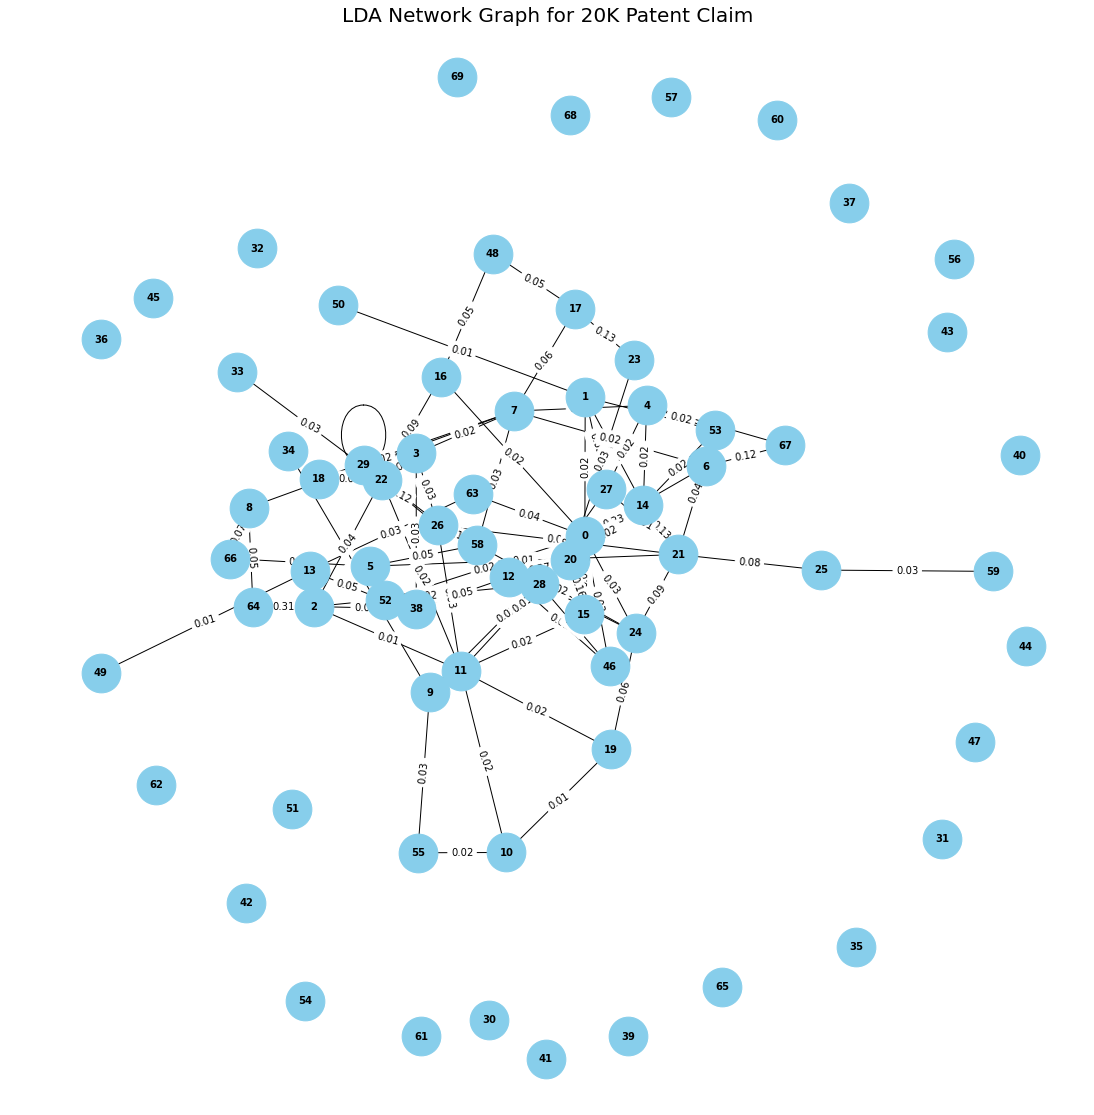

In [15]:
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt

# Get all the topic words
all_topic_words = " ".join([word for topic in lda_model.show_topics(num_topics=70, formatted=False) for word, _ in topic[1]])

# Create a list of the most frequent words
most_frequent_words = [word for word, count in Counter(all_topic_words.split()).most_common(30)]

# Create an empty graph object
G = nx.Graph()

# Add the nodes (topics) to the graph
for i in range(70):
    G.add_node(i)

# Add the edges (terms) to the graph
for i in range(70):
    topic_words = lda_model.show_topic(i, topn=10)
    for word, prob in topic_words:
        if word in most_frequent_words:
            j = most_frequent_words.index(word)
            G.add_edge(i, j, weight=prob)

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color="skyblue", node_size=1500, font_size=10, font_weight="bold")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): "{:.2f}".format(d["weight"]) for i, j, d in G.edges(data=True)})
plt.gcf().set_size_inches(15, 15)
plt.title("LDA Network Graph for 20K Patent Claim",fontsize=20)
plt.show()

In [15]:
#Get the topic and probability for each document

In [16]:
# Get the most probable topic and its probability for each document
doc_topics = [sorted(lda_model.get_document_topics(doc), key=lambda x: x[1], reverse=True) for doc in lda_output]

# Print the most probable topic and its probability for each document
# for i, doc in enumerate(doc_topics):
#     print(f"Document {i+1}:")
#     for topic, prob in doc:
#         print(f"Topic {topic}: {prob:.4f}")
#     print()

In [17]:
# Create empty columns for topic number and probability
df_claim_20K['LDA_topics'] = 0
df_claim_20K['LDA_prob'] = 0.0

# Loop through each document and update the corresponding row in the dataframe
for i, doc in enumerate(doc_topics):
    topic_num, topic_prob = doc[0]
    df_claim_20K.at[i, 'LDA_topics'] = topic_num
    df_claim_20K.at[i, 'LDA_prob'] = topic_prob

C:\Users\admin\AppData\Local\Temp/ipykernel_9396/2074810121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_20K['LDA_topics'] = 0
C:\Users\admin\AppData\Local\Temp/ipykernel_9396/2074810121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_20K['LDA_prob'] = 0.0


In [18]:
df_Claim_20K_topic=df_claim_20K[["ID","Title","Claim","cpc_subclass","Lemmatized-Claim", "LDA_topics", "LDA_prob"]]
df_Claim_20K_topic

,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,LDA_topics,LDA_prob
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",advertising displaying television program vide...,22,0.285236
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",receiving mobile switching network carrier gat...,57,0.315694
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",resistance change memory first interconnect li...,15,0.301497
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",processing first processing second processing ...,46,0.214217
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",computerimplemented transferring electronic de...,59,0.259928
...,...,...,...,...,...,...,...
19995,8975813,Light emitting device,1. A display device comprising: a first substr...,"H01L,Y10S",display first substrate first pixel first subs...,11,0.209496
19996,8975173,Semiconductor device with buried gate and meth...,1. A method for fabricating a semiconductor de...,H01L,fabricating semiconductor forming first layer ...,11,0.330709
19997,8976859,Processing a video for spatial and temporal ma...,1. A method for increasing a resolution of a v...,"G06T,H04N",increasing resolution video receiving image fr...,11,0.246703
19998,8977244,Extensible phone application,"1. A mobile communication device, comprising: ...",H04M,mobile communication memory encoded computerex...,15,0.219278


In [19]:
#prediction

In [20]:
new_claim = str(New_Sample["Lemmatized-Claim"].iloc[0])
new_claim

'communication communicating another orthogonal frequencydivision multiplexing wireless communication communication modulator modulates input signal using predetermined modulation scheme assigns modulated input signal subcarriers frequency component orthogonal thereby generating subcarrier modulation signal inserter insert transmissionside series signal synthesis way element signal synthesis element transmissionside series alternately positioned thereby generating first signal synthesis generated multiplying subcarrier modulation signal predetermined signal amplitude coefficient transmissionside series generated multiplying series set whose quantity equal number subcarriers autocorrelation property autocorrelation value series whose shifted higher autocorrelation value series whose shifted predetermined series amplitude coefficient first transformer performs inverse fast fourier transformation first separator separate operation result first transformer first half second half element eq

In [21]:
#query_tokens = quadgram_phraser[trigram_phrases[bigram_phrases[new_Abstract.split()]]]

# Tokenize the new claim and apply n-gram (1,3)
query_tokens = trigram_phrases[bigram_phrases[new_claim.split()]]

# Create a bag of words representation of the query
query_bow = id2word.doc2bow(query_tokens)

# Get the topic distribution for the query using the trained LDA model
query_lda = lda_model[query_bow]

# Print the topic distribution for the query
print(query_lda)

[(1, 0.036274824), (2, 0.01085747), (7, 0.04192288), (9, 0.024576506), (10, 0.010119548), (21, 0.30123734), (22, 0.023720015), (23, 0.016955495), (25, 0.013633607), (26, 0.0472929), (29, 0.04294408), (30, 0.010503833), (32, 0.043631762), (34, 0.041666992), (35, 0.026371282), (36, 0.014101436), (46, 0.012581556), (47, 0.027795324), (49, 0.020779526), (52, 0.050792117), (58, 0.044666894), (62, 0.020419573), (63, 0.030394722), (65, 0.06273677)]


In [22]:
# Print the most probable topic for the query
most_probable_topic = max(query_lda, key=lambda item: item[1])[0]
print(f"Most probable topic: {most_probable_topic}")

Most probable topic: 21


In [23]:
# Sort the list of topics in descending order based on their prob
sorted_topics = sorted(query_lda, key=lambda item: item[1], reverse=True)

# Select the top 3 topics from the sorted list
top_topics = [topic[0] for topic in sorted_topics[:3]]

# Print the 3 most probable topics
print(f"3 most probable topics: {top_topics}")

3 most probable topics: [21, 65, 52]


In [25]:
# Print the most significant words for the topic
top_words = lda_model.show_topic(52, topn=10)
print(f"Most probable topic for the query: {' '.join(word for word, _ in top_words)}")

Most probable topic for the query: communication transmission control component power transmitting transmit transmitted radio receiving


In [25]:
# filter the documents that have a predicted topic (for example here predicted topi for query is 21)

In [38]:
filter_topics_lda=df_Claim_20K_topic[df_Claim_20K_topic['LDA_topics'] == 52]
filter_topics_lda = filter_topics_lda.sort_values('LDA_prob', ascending=False)
filter_topics_lda = filter_topics_lda.reset_index().rename(columns={'index': 'new_index'})
filter_topics_lda

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,LDA_topics,LDA_prob
0,2529,8934755,System and method for managing multiple indepe...,1. An information handling system comprising: ...,"G06F,G09G,H04N",handling first video processor first video out...,52,0.359647
1,7480,8947595,Fingerprinting to match videos having varying ...,1. A method for generating a combined fingerpr...,"G06K,H04N",generating combined fingerprint video executed...,52,0.333845
2,1310,8930998,Method and system for providing a program guid...,"1. A method, comprising: decoding a first enco...",H04N,decoding first encoded video stream encoded vi...,52,0.320914
3,6667,8942541,Recording medium and recording method reducing...,1. A non-transitory computer-readable recordin...,"G11B,H04N",nontransitory computerreadable recording mediu...,52,0.315740
4,8854,8947493,System and method for alerting a participant i...,"1. A method, comprising: identifying an active...",H04N,identifying active speaker video session detec...,52,0.294414
5,14762,8964036,"System and method for capturing, storing, anal...",1. A method operable on a computer that is cou...,"G06K,G06Q,G06T,H04N",operable computer coupled memory video prescri...,52,0.280665
6,3147,8933961,Video processing system generating corrected g...,1. A video processing system comprising: a vid...,"G06T,H04N",video processing video ingest module receiving...,52,0.280194
7,15203,8964981,Method and system for transmitting signaling i...,1. A method of transmitting signaling informat...,H04L,transmitting signaling path network encoding t...,52,0.270390
8,5106,8938009,Layered encoded bitstream structure,"1. A method of encoding video data, the method...",H04N,encoding video encoding header video block cod...,52,0.264121
9,270,8929712,Display for displaying progress,1. A display for displaying the progress of a ...,"G08B,H04N",display displaying progress recording process ...,52,0.262336


In [39]:
#calculate the similarity between the query and document in dataset with the Doc2Vec embedding

In [40]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics.pairwise import cosine_similarity

# Convert the list of documents to a list of sentences
sentences = [doc.split() for doc in filter_topics_lda['Lemmatized-Claim'].tolist()]

# Create a list of TaggedDocument objects, where each TaggedDocument represents a single document in the corpus
# The words attribute of each TaggedDocument is set to a list of tokens for the corresponding document
# The tags attribute of each TaggedDocument is set to a list containing a single string, which is the index of the document in the corpus
tagged_data = [TaggedDocument(words=sentences[i], tags=[str(i)]) for i in range(len(sentences))]

# Train a Doc2Vec model on the tagged documents
# The vector_size parameter specifies the dimensionality of the document vectors
# The window parameter specifies the maximum distance between the predicted word and the context words within a sentence
# The min_count parameter specifies the minimum frequency of a word in the corpus to be included in the vocabulary
# The epochs parameter specifies the number of iterations over the corpus during training
model = Doc2Vec(tagged_data, vector_size=100, window=5, min_count=5, epochs=50)

# Infer the document vector for the new claim
# The split() method converts the string to a list of tokens
# The infer_vector() method calculates the document vector using the trained model
new_claim_vector = model.infer_vector(new_claim.split())

# Calculate the cosine similarity between the new claim and the documents in the corpus
# The infer_vector() method is called for each document in the corpus to calculate the document vectors
doc_vectors = [model.infer_vector(sentences[i]) for i in range(len(sentences))]
similarity_scores = cosine_similarity([new_claim_vector], doc_vectors)

In [41]:
# Add a new column to the dataframe to store the similarity scores
filter_topics_lda['cosin_similarity_Doc2vec'] = similarity_scores[0]
filter_topics_lda

,new_index,ID,Title,Claim,cpc_subclass,Lemmatized-Claim,LDA_topics,LDA_prob,cosin_similarity_Doc2vec
0,2529,8934755,System and method for managing multiple indepe...,1. An information handling system comprising: ...,"G06F,G09G,H04N",handling first video processor first video out...,52,0.359647,0.544543
1,7480,8947595,Fingerprinting to match videos having varying ...,1. A method for generating a combined fingerpr...,"G06K,H04N",generating combined fingerprint video executed...,52,0.333845,0.610705
2,1310,8930998,Method and system for providing a program guid...,"1. A method, comprising: decoding a first enco...",H04N,decoding first encoded video stream encoded vi...,52,0.320914,-0.110300
3,6667,8942541,Recording medium and recording method reducing...,1. A non-transitory computer-readable recordin...,"G11B,H04N",nontransitory computerreadable recording mediu...,52,0.315740,0.056855
4,8854,8947493,System and method for alerting a participant i...,"1. A method, comprising: identifying an active...",H04N,identifying active speaker video session detec...,52,0.294414,0.345648
5,14762,8964036,"System and method for capturing, storing, anal...",1. A method operable on a computer that is cou...,"G06K,G06Q,G06T,H04N",operable computer coupled memory video prescri...,52,0.280665,0.303932
6,3147,8933961,Video processing system generating corrected g...,1. A video processing system comprising: a vid...,"G06T,H04N",video processing video ingest module receiving...,52,0.280194,0.150538
7,15203,8964981,Method and system for transmitting signaling i...,1. A method of transmitting signaling informat...,H04L,transmitting signaling path network encoding t...,52,0.270390,0.219076
8,5106,8938009,Layered encoded bitstream structure,"1. A method of encoding video data, the method...",H04N,encoding video encoding header video block cod...,52,0.264121,0.358807
9,270,8929712,Display for displaying progress,1. A display for displaying the progress of a ...,"G08B,H04N",display displaying progress recording process ...,52,0.262336,0.044649


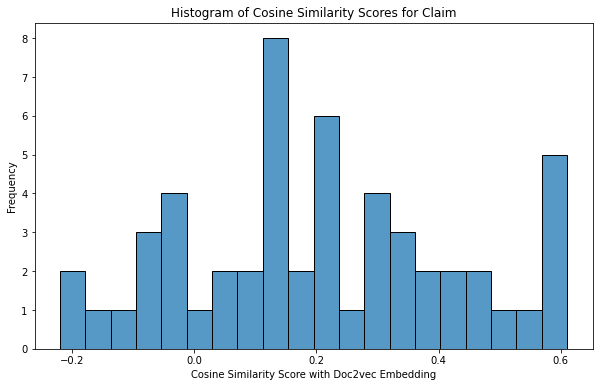

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20)
plt.title('Histogram of Cosine Similarity Scores for Claim')
plt.xlabel('Cosine Similarity Score with Doc2vec Embedding')
plt.ylabel('Frequency')
plt.show()

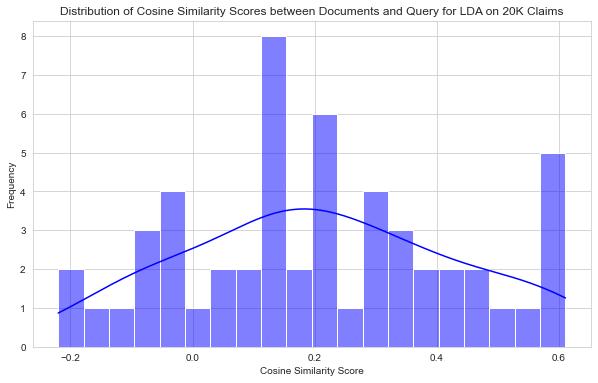

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the cosine similarity scores from the dataframe
cosine_scores = filter_topics_lda['cosin_similarity_Doc2vec']
# Set the style of the plot
sns.set_style("whitegrid")

# Plot a histogram of the cosine similarity scores
plt.figure(figsize=(10,6))
sns.histplot(cosine_scores, bins=20, kde=True, color='blue')

# Set chart title and labels
plt.title('Distribution of Cosine Similarity Scores between Documents and Query for LDA on 20K Claims')
plt.xlabel('Cosine Similarity Score')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [44]:
#get the most similar doc in dataset to query

In [45]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Claim']

most_similar_doc

'1. A method for generating a combined fingerprint of a video, the method executed by at least one computer system comprising a processor and a computer-readable storage medium, the method comprising: generating a first transformed video by applying a first aspect correction method to the video; generating a second transformed video by applying a second aspect correction method to the video; generating a first fingerprint using the first transformed video, the first fingerprint having a first half and a second half; generating a second fingerprint using the second transformed video, the second fingerprint having a first half and a second half; combining the first half of the first fingerprint with the second half of the second fingerprint to generate the combined fingerprint; and storing the combined fingerprint in the computer-readable storage medium.'

In [46]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['Lemmatized-Claim']

most_similar_doc

'generating combined fingerprint video executed least one computer processor computerreadable storage medium generating first transformed video applying first correction video generating second transformed video applying second correction video generating first fingerprint using first transformed video first fingerprint first half second half generating second fingerprint using second transformed video second fingerprint first half second half combining first half first fingerprint second half second fingerprint generate combined fingerprint storing combined fingerprint computerreadable storage medium'

In [47]:
# Sort the filter_topics_lda dataframe by cosine similarity score in descending order
filter_topics_lda = filter_topics_lda.sort_values(by=['cosin_similarity_Doc2vec'], ascending=False)

# Get the document with the highest cosine similarity score
most_similar_doc = filter_topics_lda.iloc[0]['ID']

most_similar_doc

8947595